<center><h1>Jamboree Business Case Study</h1></center>

### About
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problemsolving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to
their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission
from an Indian perspective.
### Column Profiling:
1. Serial No. (Unique row ID)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5)
5. Statement of Purpose and Letter of Recommendation Strength (out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

#### Problem Statement :
Analysis to help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [888]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import warnings
warnings.filterwarnings("ignore")



In [890]:
file_path=r"D:\Data Science Practice\Data Files\Jamboree_Admission.csv"

In [892]:
df=pd.read_csv(file_path)

In [894]:
df.columns = df.columns.str.strip()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Exploratory Data Analysis on the data

In [897]:
## Dropping the Serial No Columns
df.drop(['Serial No.'], axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [899]:
## Shape and information about the data:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


((500, 8), None)

* We can see that there are no null values, but lets do a missing value analysis

In [902]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* Checking the No of unique value in the dataset

In [905]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

* Features like University Rating, SOP, LOR, Reasearch are categorical features.

In [908]:
## Lets make the list of diff type so columns.
num_cols=['GRE Score','TOEFL Score','GCPA']
cat_cols=['University Rating','SOP','LOR','Research']
target='Chance of Admit'

In [910]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [912]:
### Correlation of the Features:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


## Univariate Graphical Analysis

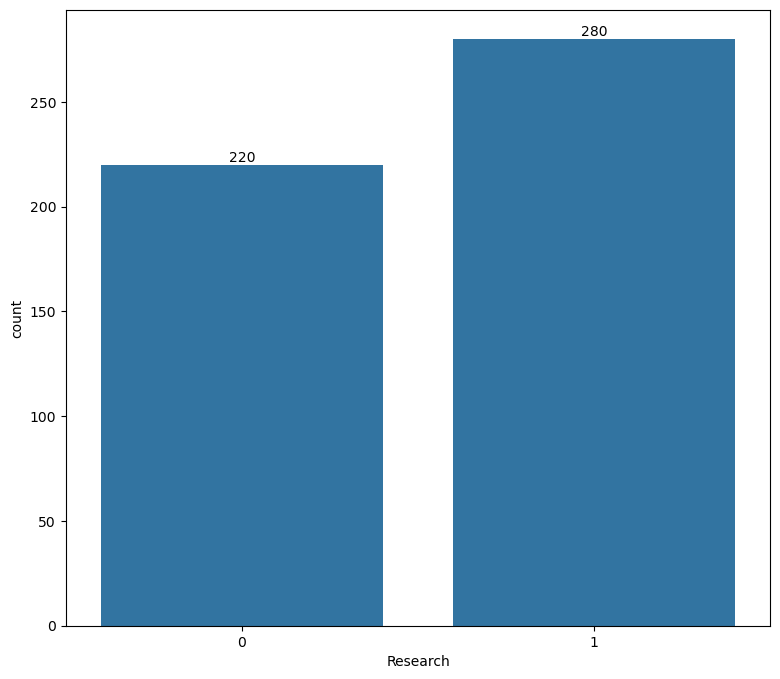

In [915]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
researchcount=df["Research"].value_counts()
ax=sns.countplot(data=df,x="Research")
for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

### We can see that the no of students with reasearch are 280, which is more that 50%

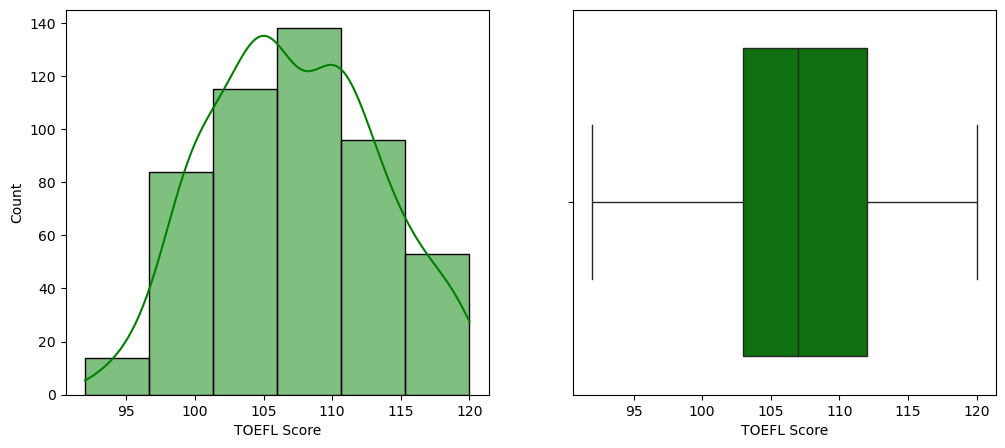

In [918]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['TOEFL Score'], bins=6, kde=True, color='green')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['TOEFL Score'], color="green")

plt.show()

## Insight
1. About 50% students score about 100-110.
2. There is no outliers in TOEFL Score.

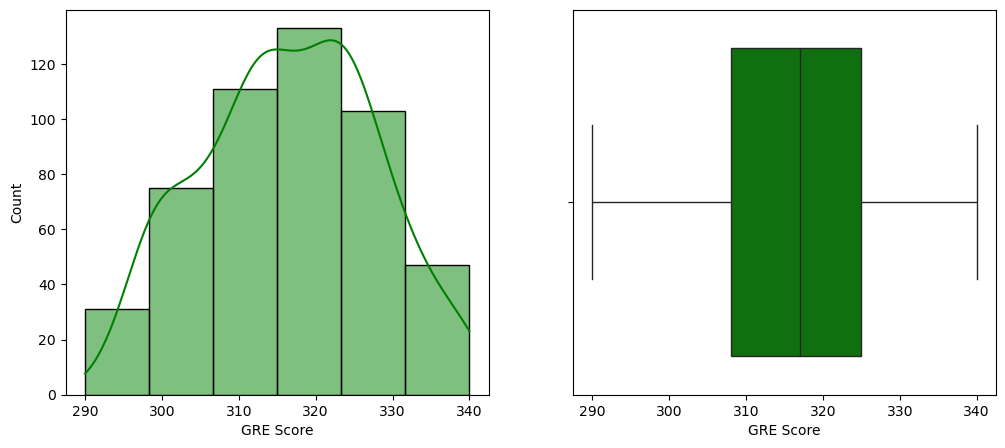

In [921]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score'], bins=6, kde=True, color='green')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['GRE Score'], color="green")

plt.show()

### Insight
1. About 49% of students scored 308-322 in GRE.
2. 9.4% students scored 332-339 and 6.2% scored 291-228.
3. There are no outliers in GRE Score.

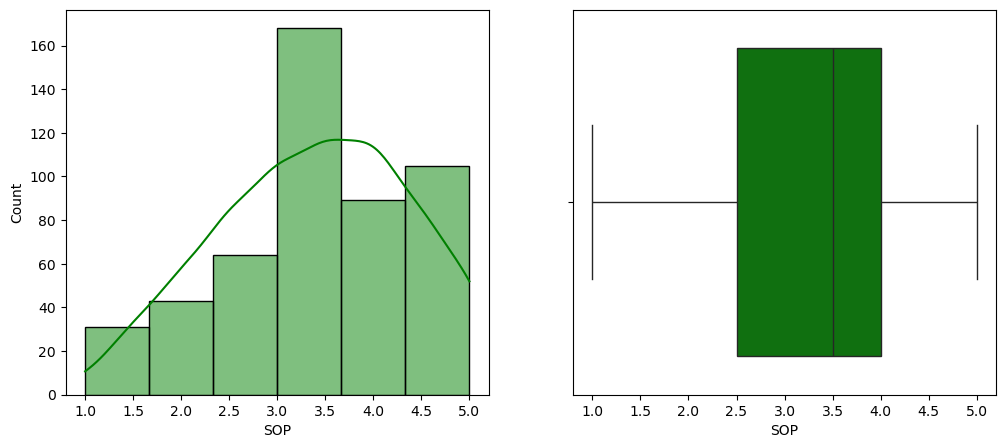

In [924]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['SOP'], bins=6, kde=True, color='green')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['SOP'], color="green")

plt.show()

### Insight
1. About 50% of students have SOP score around 3.5 to 4.0.
2. There are no outliers in GRE Score.

## Bivariate Analysis

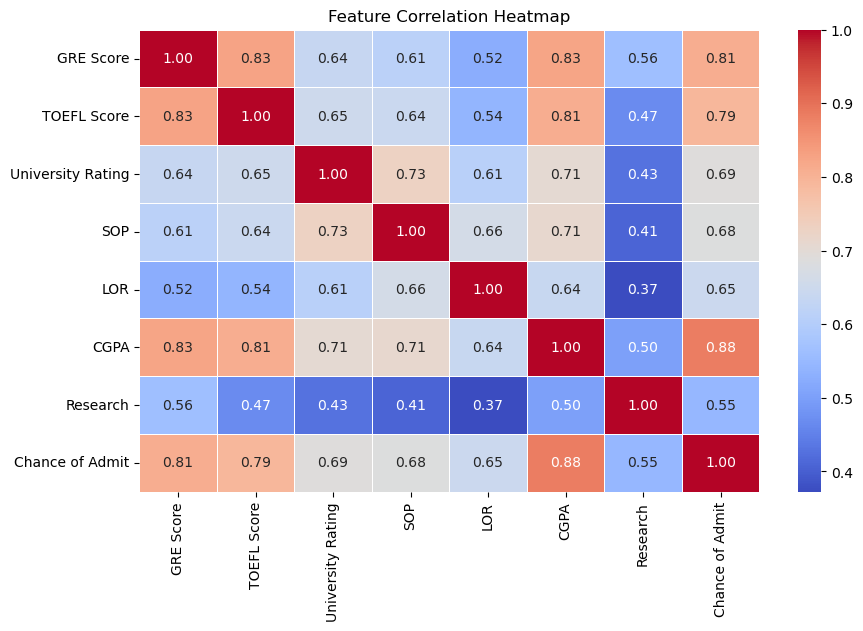

In [928]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Insight
1. CGPA have the highest correlation with the chance of admission.
2. Research have the lowest correlation with the chance of admission.

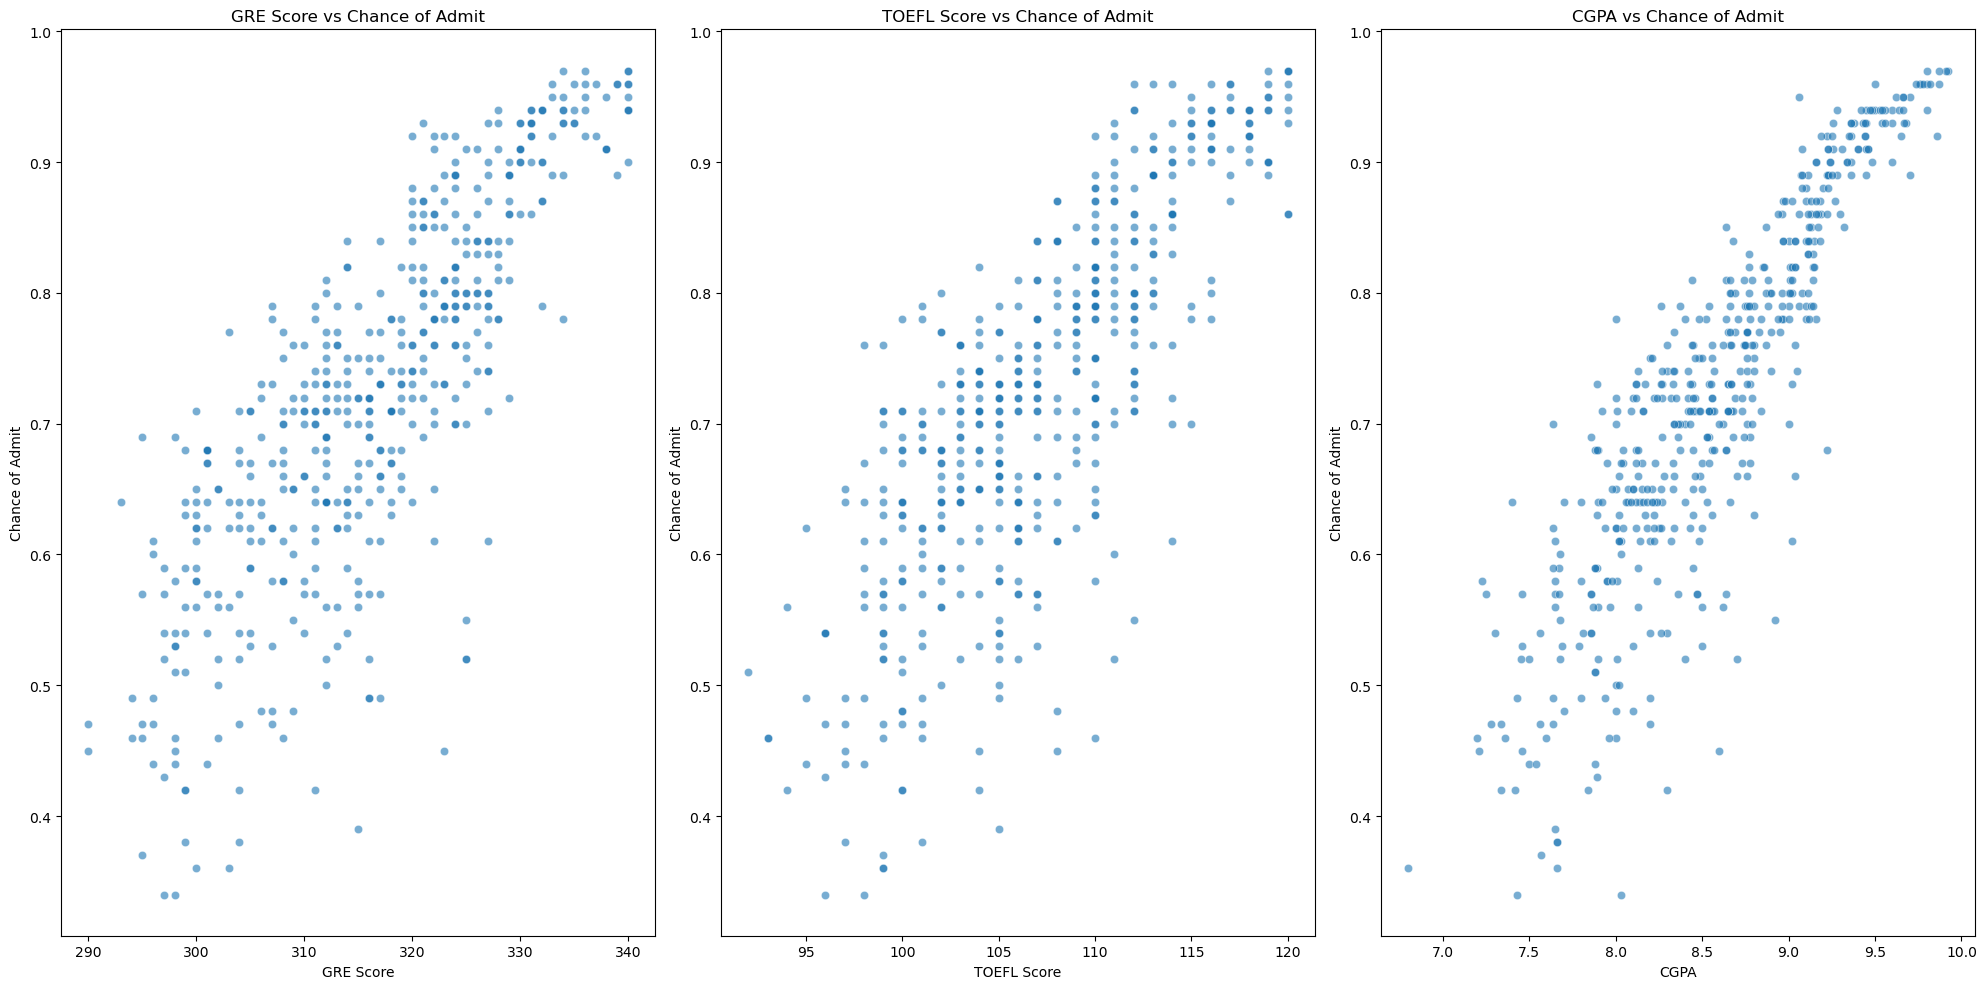

In [931]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Scatter Plot 1: GRE Score vs Chance of Admit
plt.subplot(1, 3, 1)
sns.scatterplot(x=df["GRE Score"], y=df["Chance of Admit"], alpha=0.6)
plt.title("GRE Score vs Chance of Admit")

# Scatter Plot 2: TOEFL Score vs Chance of Admit
plt.subplot(1, 3, 2)
sns.scatterplot(x=df["TOEFL Score"], y=df["Chance of Admit"], alpha=0.6)
plt.title("TOEFL Score vs Chance of Admit")

# Scatter Plot 3: CGPA vs Chance of Admit
plt.subplot(1, 3, 3)
sns.scatterplot(x=df["CGPA"], y=df["Chance of Admit"], alpha=0.6)
plt.title("CGPA vs Chance of Admit")

# Show plots
plt.tight_layout()
plt.show()


### Insight
1. GRE Score – Higher GRE scores generally correlate with a higher chance of admission.
2. TOEFL Score – Similar to GRE, a higher TOEFL score seems to improve admission chances.
3. CGPA – Strong correlation; higher CGPA leads to a higher probability of admission.

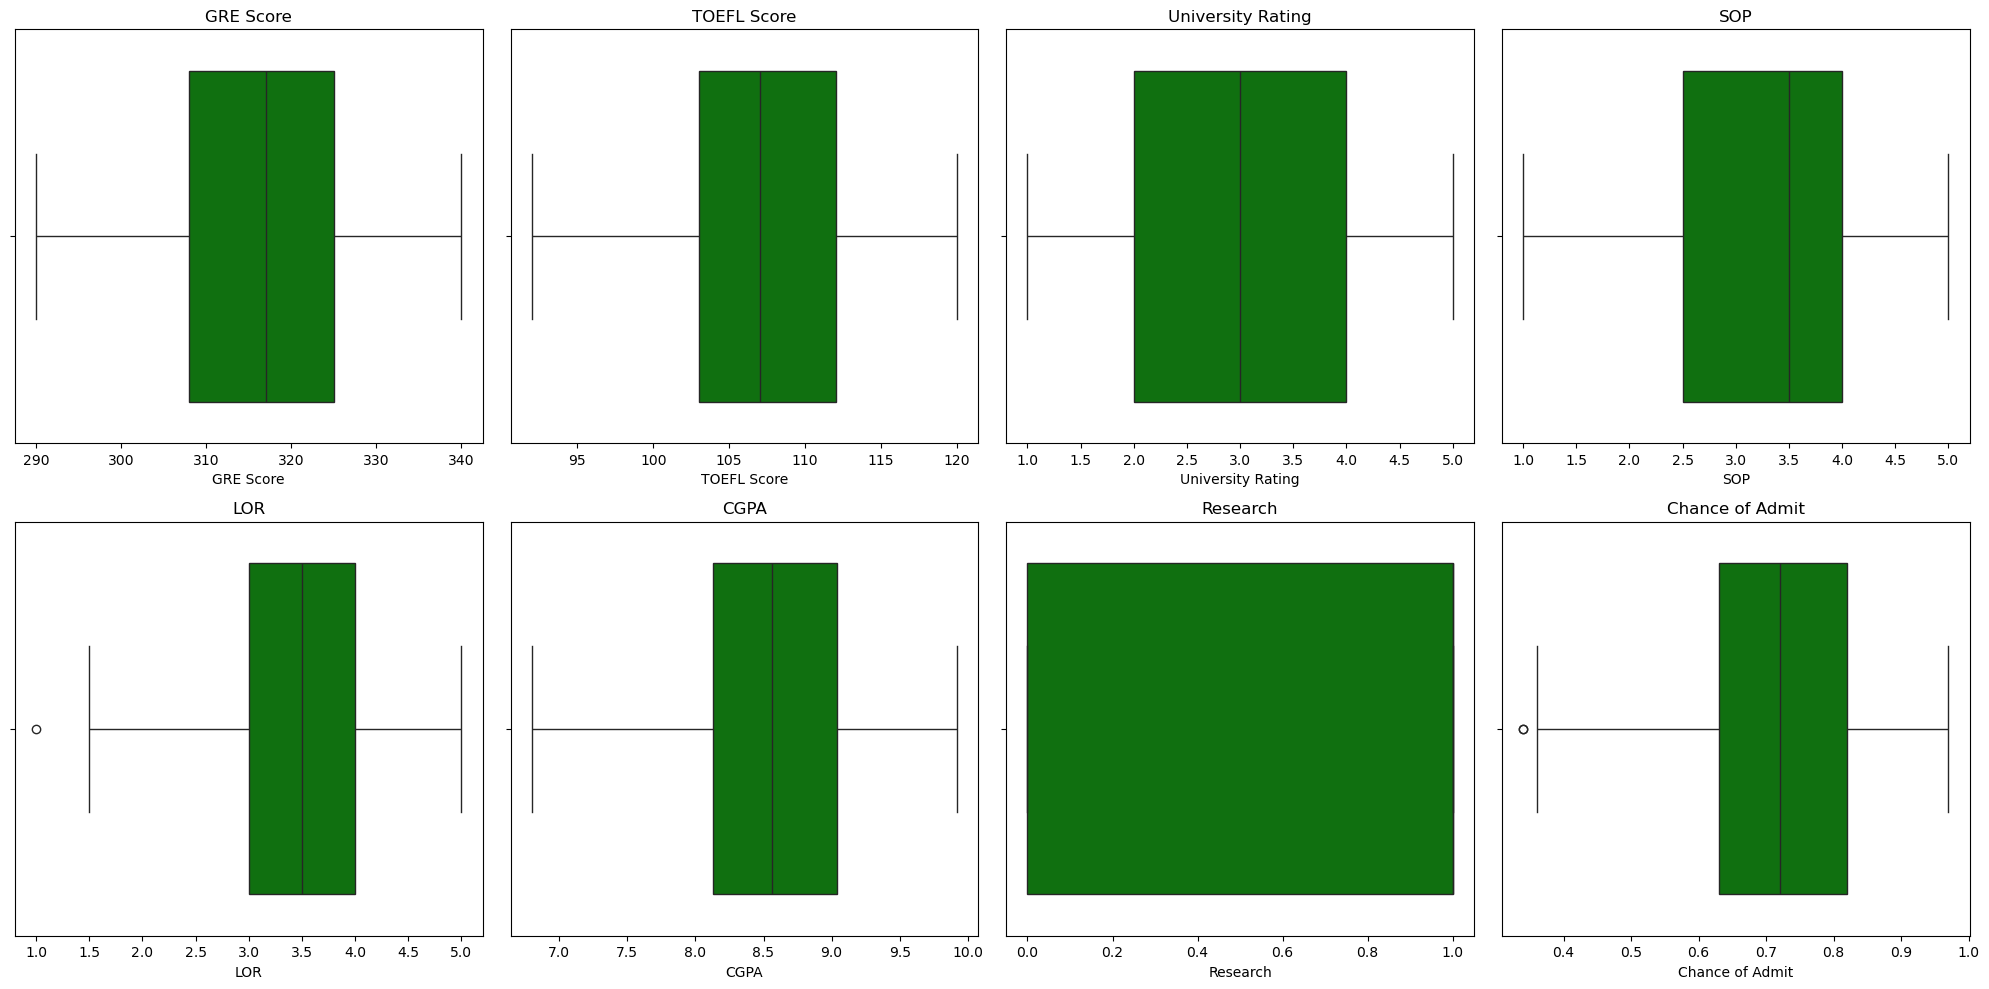

In [933]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the 2D axes array into 1D and iterate
for ax, col in zip(axes.flat, df.columns):
    sns.boxplot(x=df[col], ax=ax, color="green")
    ax.set_title(col)
plt.tight_layout()
plt.show()

#### There is no outlier values in any of the features.

### Scaling the features like GRE, TOEFL, and CGPA, so all these feautres have the equal importance


In [937]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


### Splitting data for training and testing

In [940]:
X=scaled_df.iloc[:,:-1]
y=scaled_df.iloc[:,-1]
print(X.shape,y.shape)

(500, 7) (500,)


In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [945]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Linear Regression

In [948]:
model_weights = pd.DataFrame(model.coef_.reshape(1,-1),columns=df.columns[:-1])
model_weights["Intercept"] = model.intercept_
model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


### Insight
1. CGPA,GRE Score,TOEFL Score have highest weights.
2. University Rating, SOP, Research have lowest weights.
3. Intercept (w0) is very low

In [951]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)
        
    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [953]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} \n Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} \n Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} \n Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} \n Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [955]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.3 
 Test MAE: 0.3
Train RMSE: 0.42 
 Test RMSE: 0.43
Train R2_score: 0.82 
 Test R2_score: 0.82
Train Adjusted_R2: 0.82 
 Test Adjusted_R2: 0.81
Intercept: 0.0077356807585632105
              Column      Coef
0          GRE Score  0.194823
1        TOEFL Score  0.129095
2  University Rating  0.020812
3                SOP  0.012735
4                LOR  0.113028
5               CGPA  0.482199
6           Research  0.084586
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.3 
 Test MAE: 0.3
Train RMSE: 0.42 
 Test RMSE: 0.43
Train R2_score: 0.82 
 Test R2_score: 0.82
Train Adjusted_R2: 0.82 
 Test Adjusted_R2: 0.81
Intercept: 0.007726133602251153
              Column      Coef
0          GRE Score  0.195584
1        TOEFL Score  0.130073
2  University Rating  0.021575
3                SOP  0.013802
4                LOR  0.113221
5               CGPA  0.478123
6           Research  0.08

Lasso(alpha=0.001)

### Test the assumptions of linear regression:
1. Multicollinearity check by VIF score: The Variance Inflation Factor (VIF) helps detect multicollinearity in a dataset. A VIF score greater than 5 or 10 suggests that the feature is highly correlated with others and might need removal.


In [958]:
X_vif = df[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]]

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF Score"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data

,Feature,VIF Score
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


### Interpretation:
* High multicollinearity exists in GRE Score, TOEFL Score, and CGPA (VIF > 10, extremely high).
* Moderate multicollinearity in SOP, LOR, and University Rating (VIF between 10-100).
* Research has an acceptable VIF score (<5), meaning it is not highly correlated.

### We will be running the Principle Component Analysis to address the multicollinearity issue

In [962]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vif)

# Apply PCA
pca = PCA(n_components=7)  # Start with all components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print explained variance for each principal component
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

# Decide how many components to keep (e.g., 95% variance)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"\nOptimal number of components to retain: {n_components}")

# Apply PCA with optimal components
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

print("\nReduced Feature Set Shape:", X_reduced.shape)


PC1: 0.6752
PC2: 0.7812
PC3: 0.8614
PC4: 0.9157
PC5: 0.9534
PC6: 0.9789
PC7: 1.0000

Optimal number of components to retain: 5

Reduced Feature Set Shape: (500, 5)


In [964]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [966]:
def train_model_PCA(X_train, y_train, X_test, y_test, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} \n Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} \n Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} \n Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} \n Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    print("-"*50)
    

In [968]:
train_model_PCA(X_train_pca, y_train_pca, X_test_pca, y_test_pca, "linear")
train_model_PCA(X_train_pca, y_train_pca, X_test_pca, y_test_pca, "ridge")
train_model_PCA(X_train_pca, y_train_pca, X_test_pca, y_test_pca, "lasso")



----   Linear Regression Model  ----

Train MAE: 0.32 
 Test MAE: 0.33
Train RMSE: 0.44 
 Test RMSE: 0.46
Train R2_score: 0.81 
 Test R2_score: 0.79
Train Adjusted_R2: 0.8 
 Test Adjusted_R2: 0.78
Intercept: 0.0051044036351570315
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.32 
 Test MAE: 0.33
Train RMSE: 0.44 
 Test RMSE: 0.46
Train R2_score: 0.81 
 Test R2_score: 0.79
Train Adjusted_R2: 0.8 
 Test Adjusted_R2: 0.78
Intercept: 0.005134313756406491
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.52 
 Test MAE: 0.51
Train RMSE: 0.66 
 Test RMSE: 0.66
Train R2_score: 0.56 
 Test R2_score: 0.58
Train Adjusted_R2: 0.56 
 Test Adjusted_R2: 0.56
Intercept: 0.013978185254363302
--------------------------------------------------


2. Mean of residuals

In [971]:
# Train and Predict on Original Features
model_orig = LinearRegression()
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)

# Train and Predict on PCA Features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Residuals (Actual - Predicted)
residuals_orig = y_test - y_pred_orig
residuals_pca = y_test - y_pred_pca

# Mean of Residuals
mean_residuals_orig = np.mean(residuals_orig)
mean_residuals_pca = np.mean(residuals_pca)

print(f"Mean of Residuals (Without PCA): {mean_residuals_orig:.4f}")
print(f"Mean of Residuals (With PCA): {mean_residuals_pca:.4f}")


Mean of Residuals (Without PCA): -0.0387
Mean of Residuals (With PCA): -0.0255


3. Linearity of variables (no pattern in residual plot)


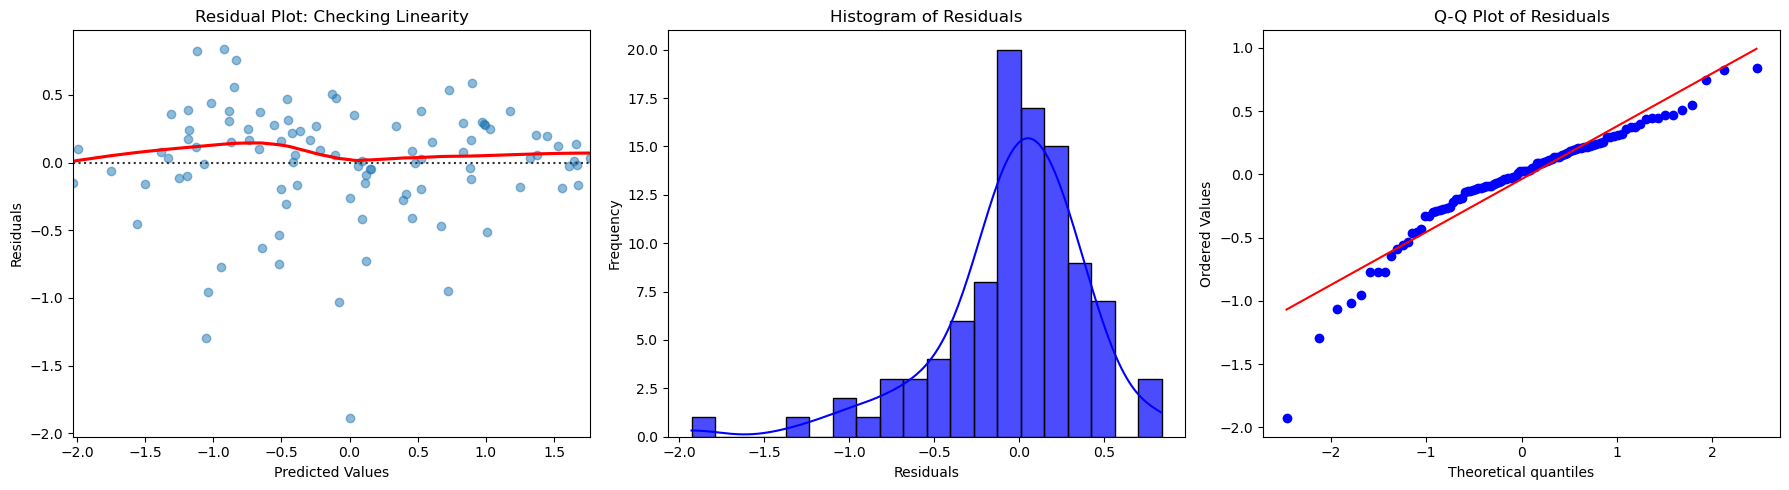

In [974]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual Plot (Checking Linearity)
sns.residplot(x=y_pred_orig, y=residuals_orig, lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_xlabel("Predicted Values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot: Checking Linearity")

# Histogram of Residuals (Checking Normality)
sns.histplot(residuals_orig, kde=True, bins=20, color="blue", alpha=0.7, ax=axes[1])
axes[1].set_xlabel("Residuals")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# Q-Q Plot (Checking Normality)
stats.probplot(residuals_orig, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot of Residuals")

# Adjust layout
plt.tight_layout()
plt.show()


### Intepretation:
* Randomly scattered residuals (no clear pattern): Linearity holds.
* Histogram (Bell Shape) → Residuals are normally distributed (good).
* Q-Q Plot (Straight Line) → Residuals follow a normal distribution (good).

4. Test for Homoscedasticity :
    Homoscedasticity means the variance of residuals is constant across all levels of the predicted values. If the spread of residuals increases or decreases, it indicates heteroscedasticity, which can lead to inefficient predictions.

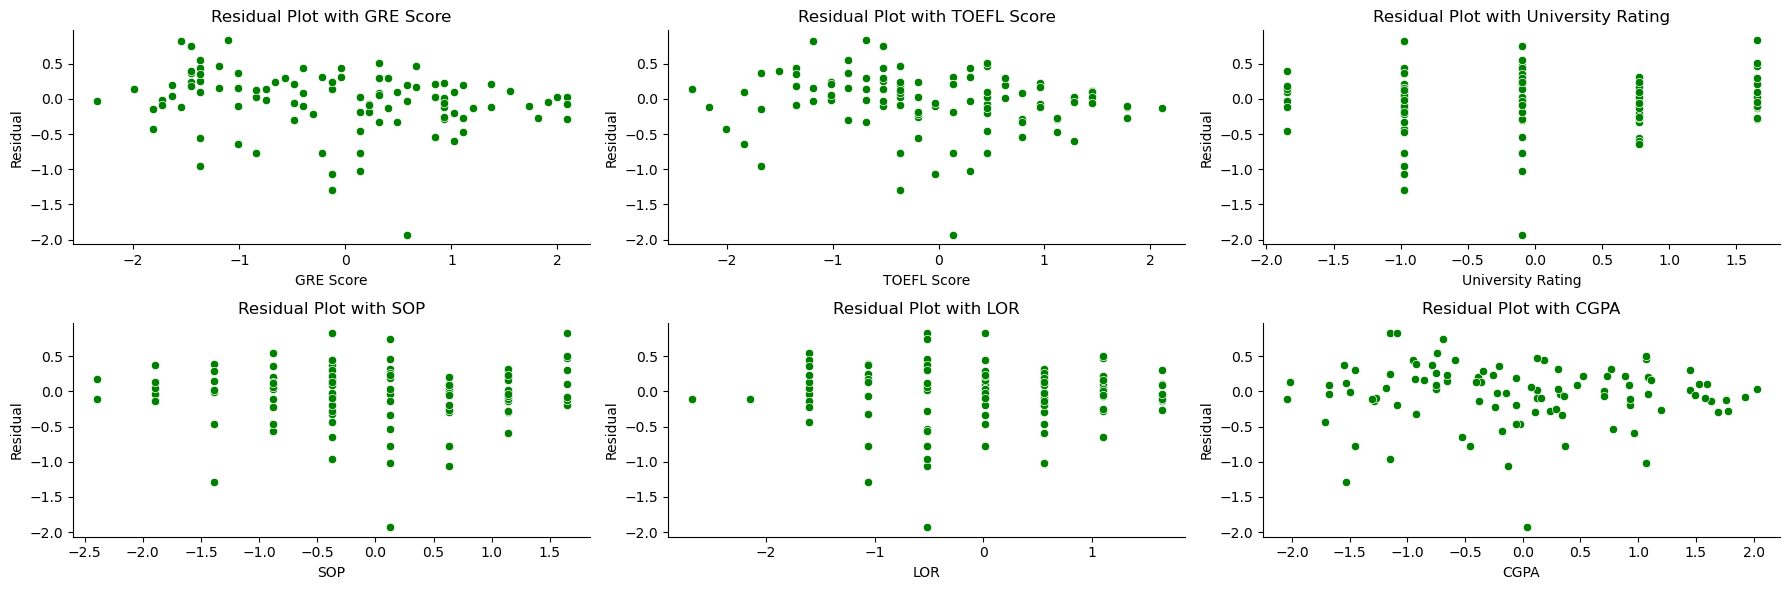

In [977]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(18, 6))
residual = y_test.values - y_pred_test
i=1
for col in X_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=X_test[col].values.reshape((-1,)), y=residual.reshape((-1,)),color='g')
    plt.title(f'Residual Plot with {col}')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

In [979]:
X_test_with_const = sm.add_constant(X_test)

# Perform Breusch-Pagan Test using residuals from test set
bp_test = het_breuschpagan(residuals_orig, X_test_with_const)
p_value = bp_test[1]  # Extracting the p-value

# Interpretation of Breusch-Pagan Test
if p_value > 0.05:
    print("Residuals have constant variance (Homoscedasticity holds).")
else:
    print("Heteroscedasticity detected (Consider transformations).")


Residuals have constant variance (Homoscedasticity holds).


### Summary of the Regression Techniques Employed:
1. By conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.
Additionally, GRE and TOEFL scores also hold significant importance.
2. Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.
3. Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.
4. After exploring regularized models such as Ridge and Lasso regression, showed comparable results to the Linear Regression Model.
5. All the assumptions of the Linear Regression Model hold True
### Recommendation
1. Encourage students to focus on improving GRE scores, CGPA, and Letters of Recommendation (LOR), as these factors influence a lot your chances of admission.
2. Beyond academic metrics, applicants can also add, like extracurricular achievements, personal statements, and diversity factors.
3. We can enhance our predictive model by adding other important and diverse features like work experience, internships, or extracurricular activities.